# Guia regresión - Resuelto
## Consigna
Para el dataset a continuación, calcular la regresión polinómica e ir variando el orden hasta obtener el resultado óptimo de AIC y BIC. También calcular $ R^2 $ y los p values.

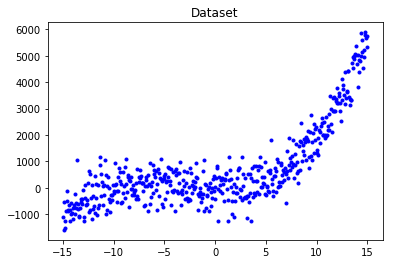

In [22]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

x = np.load('X.npy')
y = np.load('y.npy')
plt.figure()
plt.plot(x, y,'.',  color='blue')
plt.title('Dataset')
plt.show()

# this allows plots to appear directly in the notebook
%matplotlib inline

# Funciones

In [57]:
'''Función encargada de armar el polinomio'''
#Recibe: Una lista de valores (En este caso del tipo x) y el grado del polinomio.
#Retorna: Lista con los polinomios para c/valor de la lista_valores.
#Uso : En el FIT.
def Armar_Polinomio_de_Grado_N (lista_valores,N):
    new_list_return=list()
    for i in lista_valores:
        new_list_return.append([i])
        for j in range(1,N):    
            new_list_return[-1].append(i**j)
    return new_list_return

# Solución

In [58]:
count_x = np.count_nonzero(x)
count_y = np.count_nonzero(y)
print("Cantidad de elementos en x: ",count_x)
print("Cantidad de elementos en y: ",count_y)
print("\nPrimeros 10 elementos de x e y:")
print("x:",x[0:10])
print("\ny:",y[0:10])

Cantidad de elementos en x:  500
Cantidad de elementos en y:  500

Primeros 10 elementos de x e y:
x: [-15.         -14.93987976 -14.87975952 -14.81963928 -14.75951904
 -14.6993988  -14.63927856 -14.57915832 -14.51903808 -14.45891784]

y: [-1106.05898936 -1601.67828299  -538.87681151 -1250.44850105
 -1525.05919039  -886.87092948  -113.08388129  -498.66479628
  -886.32891294  -841.73274315]


# Aplico la solución por regresión lineal utilizando sklearn

## Donde:
    - N: Grado del polinomio.
    - Porc_Train: Porcentaje de datos utilizados para el entrenamiento.
    - Porc_Test: Porcentaje de datos utilizados para el testeo ( 1 - Porc_Train).
    - x: Datos de X.
    - y: Datos de Y.

In [63]:
#Definición de variables del modelo:
Porc_Train = 0.5
Porc_Test = 1 - Porc_Train
#Sklearn - Regresión lineal
lm3 = LinearRegression()
#Calculo el index maximo
Index_Train_Set = int(round(count_x * Porc_Train))
Index_Test_Set = count_x - Index_Train_Set
#Separo los sets en Train_Set y Test_Set
Training_Set_X = x[:Index_Train_Set]
Training_Set_Y = y[:Index_Train_Set]
Test_Set_X = x[:Index_Test_Set]
Test_Set_Y = y[:Index_Test_Set]

In [64]:
#Orden - 1
N = 1
lm3.fit(Armar_Polinomio_de_Grado_N(Training_Set_X,N), Training_Set_Y)
print("La ordenada al origen de nuestro modelo polinómico es: {}".format(lm3.intercept_))
print("\nLos coeficientes del modelo polinómico de orden {} son:".format(N))
print(lm3.coef_)

La ordenada al origen de nuestro modelo polinómico es: 250.86858591200522

Los coeficientes del modelo polinómico de orden 1 son:
[47.06958744]


In [65]:
#Orden - 2
N = 2
lm3.fit(Armar_Polinomio_de_Grado_N(Training_Set_X,N), Training_Set_Y)
print("La ordenada al origen de nuestro modelo polinómico es: {}".format(lm3.intercept_))
print("\nLos coeficientes del modelo polinómico de orden {} son:".format(N))
print(lm3.coef_)

La ordenada al origen de nuestro modelo polinómico es: 250.86858591200516

Los coeficientes del modelo polinómico de orden 2 son:
[23.53479372 23.53479372]


In [66]:
#Orden - 3
N = 3
lm3.fit(Armar_Polinomio_de_Grado_N(Training_Set_X,N), Training_Set_Y)
print("La ordenada al origen de nuestro modelo polinómico es: {}".format(lm3.intercept_))
print("Los coeficientes del modelo polinómico de orden {} son:".format(N))
print(lm3.coef_)

La ordenada al origen de nuestro modelo polinómico es: -250.34731982051326
Los coeficientes del modelo polinómico de orden 3 son:
[-76.50710073 -76.50710073 -13.31224142]


In [70]:
#Orden - 4
N = 4
lm3.fit(Armar_Polinomio_de_Grado_N(Training_Set_X,N), Training_Set_Y)
print("La ordenada al origen de nuestro modelo polinómico es: {}".format(lm3.intercept_))
print("Los coeficientes del modelo polinómico de orden {} son:".format(N))
print(lm3.coef_)

La ordenada al origen de nuestro modelo polinómico es: -176.16298685741756
Los coeficientes del modelo polinómico de orden 4 son:
[-46.89409694 -46.89409694  -3.4610741    0.436954  ]


In [71]:
#Orden - 5
N = 5
lm3.fit(Armar_Polinomio_de_Grado_N(Training_Set_X,N), Training_Set_Y)
print("La ordenada al origen de nuestro modelo polinómico es: {}".format(lm3.intercept_))
print("Los coeficientes del modelo polinómico de orden {} son:".format(N))
print(lm3.coef_)

La ordenada al origen de nuestro modelo polinómico es: -231.77300579930764
Los coeficientes del modelo polinómico de orden 5 son:
[-8.38878214e+01 -8.38878214e+01 -2.56120204e+01 -1.85556041e+00
 -7.62643128e-02]


In [72]:
#Orden - 6
N = 6
lm3.fit(Armar_Polinomio_de_Grado_N(Training_Set_X,N), Training_Set_Y)
print("La ordenada al origen de nuestro modelo polinómico es: {}".format(lm3.intercept_))
print("Los coeficientes del modelo polinómico de orden {} son:".format(N))
print(lm3.coef_)

La ordenada al origen de nuestro modelo polinómico es: -215.85764253599453
Los coeficientes del modelo polinómico de orden 6 son:
[-6.80099195e+01 -6.80099195e+01 -1.08239008e+01  7.68070439e-01
  1.20111707e-01  5.22622048e-03]


In [73]:
#Orden - 7
N = 7
lm3.fit(Armar_Polinomio_de_Grado_N(Training_Set_X,N), Training_Set_Y)
print("La ordenada al origen de nuestro modelo polinómico es: {}".format(lm3.intercept_))
print("Los coeficientes del modelo polinómico de orden {} son:".format(N))
print(lm3.coef_)

La ordenada al origen de nuestro modelo polinómico es: -136.12491995106134
Los coeficientes del modelo polinómico de orden 7 son:
[4.33125117e+01 4.33125117e+01 1.37274201e+02 4.01778923e+01
 5.03626346e+00 2.93058870e-01 6.38348853e-03]


In [74]:
#Orden - 8
N = 8
lm3.fit(Armar_Polinomio_de_Grado_N(Training_Set_X,N), Training_Set_Y)
print("La ordenada al origen de nuestro modelo polinómico es: {}".format(lm3.intercept_))
print("Los coeficientes del modelo polinómico de orden {} son:".format(N))
print(lm3.coef_)

La ordenada al origen de nuestro modelo polinómico es: -59.22369006760087
Los coeficientes del modelo polinómico de orden 8 son:
[1.86387334e+02 1.86387335e+02 3.94179662e+02 1.35118364e+02
 2.24054265e+01 1.95708096e+00 8.63413035e-02 1.51995999e-03]


In [75]:
#Orden - 9
N = 9
lm3.fit(Armar_Polinomio_de_Grado_N(Training_Set_X,N), Training_Set_Y)
print("La ordenada al origen de nuestro modelo polinómico es: {}".format(lm3.intercept_))
print("Los coeficientes del modelo polinómico de orden {} son:".format(N))
print(lm3.coef_)

La ordenada al origen de nuestro modelo polinómico es: -114.2219171382832
Los coeficientes del modelo polinómico de orden 9 son:
[ 5.49435856e+01  5.49435780e+01  8.83241281e+01 -1.40576636e+01
 -1.48067691e+01 -3.19214489e+00 -3.13331354e-01 -1.47602298e-02
 -2.70793824e-04]


In [76]:
#Orden - 10
N = 10
lm3.fit(Armar_Polinomio_de_Grado_N(Training_Set_X,N), Training_Set_Y)
print("La ordenada al origen de nuestro modelo polinómico es: {}".format(lm3.intercept_))
print("Los coeficientes del modelo polinómico de orden {} son:".format(N))
print(lm3.coef_)

La ordenada al origen de nuestro modelo polinómico es: -33.78574160264648
Los coeficientes del modelo polinómico de orden 10 son:
[2.94941321e+02 2.94940124e+02 7.90050066e+02 4.21438182e+02
 1.26399531e+02 2.31085885e+01 2.60280452e+00 1.75289185e-01
 6.44649773e-03 9.93164008e-05]


In [77]:
lm3.conf_int()

AttributeError: 'LinearRegression' object has no attribute 'conf_int'